# Multidimensional Scaling (MDS)

Multidimensional Scaling is a family of statistical methods that focus on creating mappings of items based on distance. It projects your dataset into a space of fewer dimensions while attempting to preserve the distances of your data points in the original space.

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [2]:
raw_data = pd.read_csv('data/A_multivariate_study_of_variation_in_two_species_of_rock_crab_of_genus_Leptograpsus.csv')

data = raw_data.rename(columns={
    'sp': 'Species',
    'sex': 'Sex',
    'index': 'Index',
    'FL': 'Frontal Lobe',
    'RW': 'Rear Width',
    'CL': 'Carapace Midline',
    'CW': 'Maximum Width',
    'BD': 'Body Depth'})

data['Species'] = data['Species'].map({'B':'Blue', 'O':'Orange'})
data['Sex'] = data['Sex'].map({'M':'Male', 'F':'Female'})
data['Class'] = data.Species + data.Sex

data_columns = ['Frontal Lobe',
                'Rear Width',
                'Carapace Midline',
                'Maximum Width',
                'Body Depth']

data.head()

,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


In [3]:
# generate a class variable for all 4 classes
data['Class'] = data.Species + data.Sex

print(data['Class'].value_counts())
data.head(5)

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: Class, dtype: int64


,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale


|    | Species | Sex | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | Class |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Blue | Male | 1 | 8.1 | 6.7 | 16.1 | 19.0 | 7.0 | BlueMale |
| 1 | Blue | Male | 2 | 8.8 | 7.7 | 18.1 | 20.8 | 7.4 | BlueMale |
| 2 | Blue | Male | 3 | 9.2 | 7.8 | 19.0 | 22.4 | 7.7 | BlueMale |
| 3 | Blue | Male | 4 | 9.6 | 7.9 | 20.1 | 23.1 | 8.2 | BlueMale |
| 4 | Blue | Male | 5 | 9.8 | 8.0 | 20.3 | 23.0 | 8.2 | BlueMale |

In [8]:
# normalize data columns
data_norm = data.copy()
data_norm[data_columns] = MinMaxScaler().fit_transform(data[data_columns])

data_norm.describe()

,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.500000,0.527233,0.455365,0.529043,0.515053,0.511645
std,14.467083,0.219832,0.187835,0.216382,0.209919,0.220953
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.358491,0.328467,0.382219,0.384000,0.341935
50%,25.500000,0.525157,0.459854,0.528875,0.525333,0.503226
75%,38.000000,0.682390,0.569343,0.684650,0.664000,0.677419
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


|  | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth |
| -- | -- | -- | -- | -- | -- | -- |
| count | 200.000000 | 200.000000 | 200.000000 | 200.000000 | 200.000000 | 200.000000 |
| mean | 25.500000 | 0.527233 | 0.455365 | 0.529043 | 0.515053 | 0.511645 |
| std | 14.467083 | 0.219832 | 0.187835 | 0.216382 | 0.209919 | 0.220953 |
| min | 1.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 |
| 25% | 13.000000 | 0.358491 | 0.328467 | 0.382219 | 0.384000 | 0.341935 |
| 50% | 25.500000 | 0.525157 | 0.459854 | 0.528875 | 0.525333 | 0.503226 |
| 75% | 38.000000 | 0.682390 | 0.569343 | 0.684650 | 0.664000 | 0.677419 |
| max | 50.000000 | 1.000000 | 1.000000 | 1.000000 | 1.000000 | 1.000000 |

## 2-Dimensional Plot

In [18]:
no_components = 2
n_init = 15
metric = True
n_stress='auto'

mds = MDS(
    n_components=no_components,
    n_init=n_init, metric=metric,
    normalized_stress=n_stress)

data_mds = mds.fit_transform(data_norm[data_columns])
print('MSE: ', mds.stress_)
# MSE:  3.886582480465905
# the more components you add the smaller
# the mean squared error becomes - meaning
# your model starts to fit better

data_norm[['MDS1', 'MDS2']] = data_mds
data_norm.head(1)

MSE:  3.886582480465905


,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class,MDS1,MDS2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,-0.482199,-0.917839


|    | Species | Sex | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | Class | MDS1 | MDS2 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Blue | Male | 1 | 0.056604 | 0.014599 | 0.042553 | 0.050667 | 0.058065 | BlueMale | -0.482199 | -0.917839 |

<AxesSubplot: xlabel='MDS1', ylabel='MDS2'>

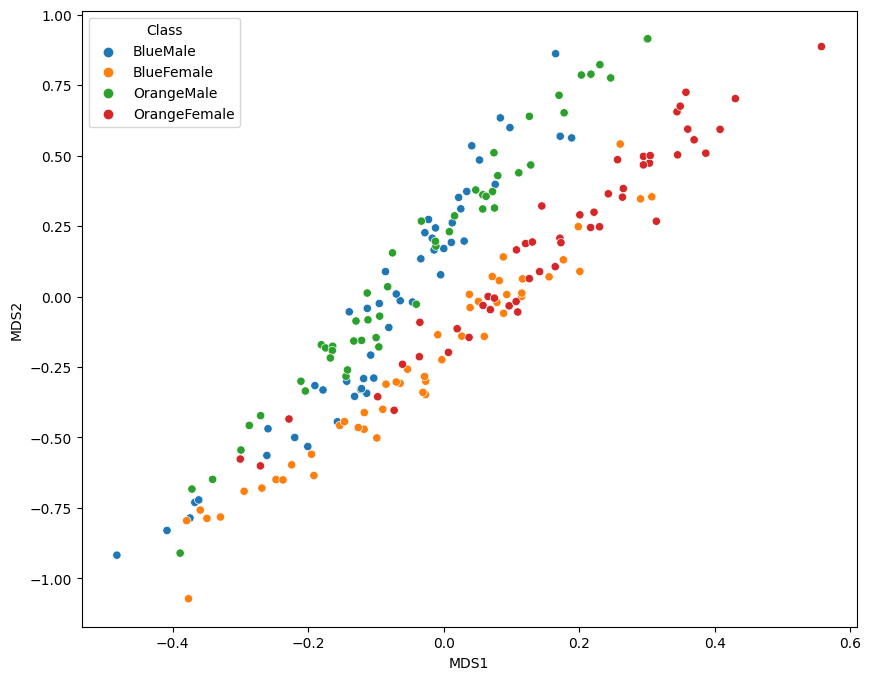

In [21]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='MDS1', y='MDS2', hue='Class', data=data_norm)

![Multidimensional Scaling (MDS)](./assets/Multi-Dimensional_Scaling_01.png)

## 3-Dimensional Plot

In [22]:
no_components = 3
n_init = 15
metric = True
n_stress='auto'

mds = MDS(
    n_components=no_components,
    n_init=n_init, metric=metric,
    normalized_stress=n_stress)

data_mds = mds.fit_transform(data_norm[data_columns])
print('MSE: ', mds.stress_)
# MSE:  2.4601741009431457

data_norm[['MDS1', 'MDS2', 'MDS3']] = data_mds
data_norm.head(1)

MSE:  2.4601741009431457


,Species,Sex,Index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,Class,MDS1,MDS2,MDS3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,-0.093961,0.80491,0.645809


|    | Species | Sex | Index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | Class | MDS1 | MDS2 | MDS3 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Blue | Male | 1 | 0.056604 | 0.014599 | 0.042553 | 0.050667 | 0.058065 | BlueMale | -0.093961 | 0.80491 | 0.645809 |

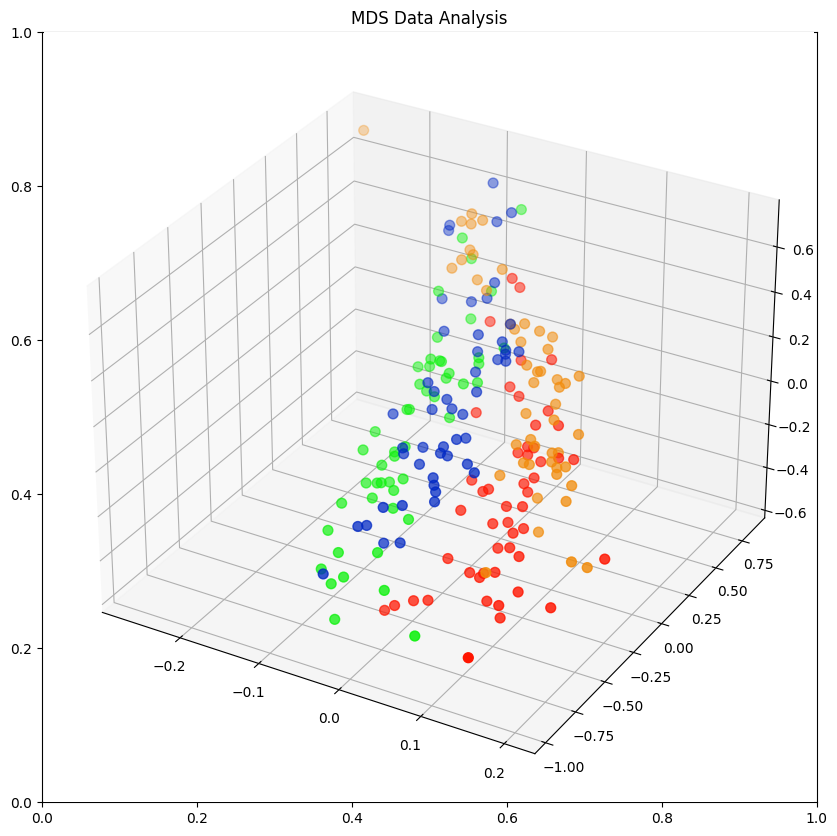

In [23]:
class_colours = {
    'BlueMale': '#0027c4', #blue
    'BlueFemale': '#f18b0a', #orange
    'OrangeMale': '#0af10a', # green
    'OrangeFemale': '#ff1500', #red
}

colours = data_norm['Class'].apply(lambda x: class_colours[x])

x=data_norm.MDS1
y=data_norm.MDS2
z=data_norm.MDS3

fig = plt.figure(figsize=(10,10))
plt.title('MDS Data Analysis')
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=x, ys=y, zs=z, s=50, c=colours)

![Multidimensional Scaling (MDS)](./assets/Multi-Dimensional_Scaling_02.png)